<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 2 Assignment 1*

Analyze a corpus of text using text visualization of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Stemming
- Lemmatization
- Custom stopword removal
- Using frequency based stopwrod removal

You are free to use any dataset you are interested in. Kaggle is a great place to start. Feel free to sample the data if the dataset is too large to hanlde in memory. 

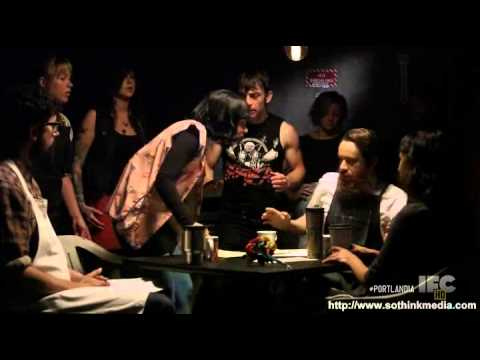

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [3]:
import pandas as pd

yelp = pd.read_csv('/Users/mattmastin/Desktop/yelp.csv')
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [1]:
from collections import Counter
import re

import pandas as pd

import squarify
import matplotlib.pyplot as plt
import seaborn as sns

import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load('en_core_web_md')

In [7]:
columns = ['business_id', 'stars', 'text']

yelp = yelp[columns]

In [8]:
yelp.head()

,business_id,stars,text
0,9yKzy9PApeiPPOUJEtnvkg,5,My wife took me here on my birthday for breakf...
1,ZRJwVLyzEJq1VAihDhYiow,5,I have no idea why some people give bad review...
2,6oRAC4uyJCsJl1X0WZpVSA,4,love the gyro plate. Rice is so good and I als...
3,_1QQZuf4zZOyFCvXc0o6Vg,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,6ozycU1RpktNG2-1BroVtw,5,General Manager Scott Petello is a good egg!!!...


In [10]:
yelp['text'] = yelp['text'].apply(lambda x: x.lower())

/Users/mattmastin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
yelp.head()

,business_id,stars,text
0,9yKzy9PApeiPPOUJEtnvkg,5,my wife took me here on my birthday for breakf...
1,ZRJwVLyzEJq1VAihDhYiow,5,i have no idea why some people give bad review...
2,6oRAC4uyJCsJl1X0WZpVSA,4,love the gyro plate. rice is so good and i als...
3,_1QQZuf4zZOyFCvXc0o6Vg,5,"rosie, dakota, and i love chaparral dog park!!..."
4,6ozycU1RpktNG2-1BroVtw,5,general manager scott petello is a good egg!!!...


In [13]:
def tokenize(text):
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    
    tokens = tokens.lower().split()
    
    return tokens

In [14]:
yelp['tokens'] = yelp['text'].apply(tokenize)

In [15]:
yelp['tokens'].head()

0    [my, wife, took, me, here, on, my, birthday, f...
1    [i, have, no, idea, why, some, people, give, b...
2    [love, the, gyro, plate, rice, is, so, good, a...
3    [rosie, dakota, and, i, love, chaparral, dog, ...
4    [general, manager, scott, petello, is, a, good...
Name: tokens, dtype: object

In [16]:
from collections import Counter

word_counts = Counter()

yelp['tokens'].apply(lambda x: word_counts.update(x))

word_counts.most_common(20)

[('the', 65081),
 ('and', 43451),
 ('a', 35858),
 ('i', 34617),
 ('to', 30081),
 ('of', 20856),
 ('was', 19970),
 ('is', 17235),
 ('it', 16601),
 ('for', 15151),
 ('in', 14652),
 ('that', 11789),
 ('my', 10943),
 ('with', 10741),
 ('but', 10439),
 ('you', 10115),
 ('this', 10001),
 ('on', 9206),
 ('they', 9117),
 ('have', 8695)]

In [25]:
def count(docs):
    
    word_counts = Counter()
    appears_in = Counter()
    
    total_docs = len(docs)
    
    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))
        
    temp = zip(word_counts.keys(), word_counts.values())
    
    wc = pd.DataFrame(temp, columns = ['word', 'count'])
    
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()
    
    wc['pct_total'] = wc['count'].apply(lambda x: x / total)
    
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()
    
    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')
    
    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
    
    return wc.sort_values(by='rank')

In [26]:
wc = count(yelp['tokens'])

In [27]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
14,the,9121,65081,1.0,0.050355,0.050355,0.9121
21,and,8893,43451,2.0,0.033619,0.083974,0.8893
16,a,8328,35858,3.0,0.027744,0.111719,0.8328
98,i,7825,34617,4.0,0.026784,0.138503,0.7825
65,to,7817,30081,5.0,0.023275,0.161777,0.7817


In [28]:
wc[wc['rank'] <= 20]['cul_pct_total'].max()

0.3130500246819586

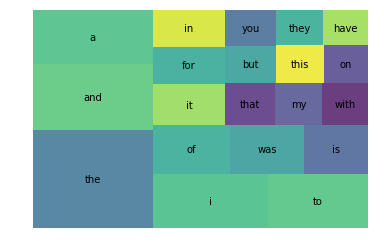

In [30]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'],
             alpha=0.8)
plt.axis('off')
plt.show()

## Stretch Goals

* Write a web scraper that can scrape "Data Scientist" job listings from indeed.com.
* Look ahead to some of the topics from later this week:
 - Part of Speech Tagging
 - Named Entity Recognition
 - Document Classification
* Try a different visualization techniques
* Automate the process of retriving job listings. ;)